## Algorithm Design 2019-20 @ Computer Science - Università di Pisa

### Scribes: Chiara Boni, Eleonora Di Gregorio 
### Lecturer: Roberto Grossi 

# Hashing
## Multiplicative Universal Hashing

### Definitions and goals

Recalling that $h: U \rightarrow$ [$m$] is an hashing function, generated randomly, which maps from an universe $U$ of keys to a set of has values [$m$] = {$0,...,m-1$}; it is $universal$, therefore for any given distinct keys $x,y \in U$, there is a low probability of collision in $h$: <br>
$Pr_{h}$[$h(x) = h(y)$] $\le 1/m$. <br>
$h$ is called $c-universal$ when, for some $c = O(1)$, $Pr_{h}$[$h(x) = h(y)$] $\le c/m$. <p>

### Designing a universal class of hash functions

This scheme was proposed by Dietzfelbinger and it generally addresses hashing from $w$-bit integers to $l$-bit integers.<br>
After picking uniformly random an odd $w$-bit integer $a$, it has to be computed $h_{a}:$[$2^{w}$] $\rightarrow$ [$2^{l}$], as $h_{a}(x)$ = [($ax$ mod $2^{w}$)/$s^{w-l}$].<br>
With this schema numbers are stored as $bit$ $strings$, with the least significant bit to the right, so the integer division by a power of two would be represented as a $right$ $shift$. <br>
It operates by extracting bits from $w-l$ to $w-1$, from the product $ax$, as illustrated: <br>
<img src="bitVector.png" /> <p>

$Claim$ <br>
Multiply-shift is 2-universal, for $x \ne y$, therefore <br>
$Pr_{a \in [2^{w}], odd}$ [$h_{a}(x) = h_{a}(y)$] $\le 2/2^{l} = 2/m$. <p>
    
$Proof$ <br>
$h_{a}(x) = h_{a}(y)$ is a collision and that occurs only if $ax$ and $ay = ax + a(y-x)$ are the same on the bits $w-l,..,w-1$. <br>
This match requires that bits $w-l,..,w-1$ of $(y-x)$ are either all 0s or 1s. <br>
In order to have this condition fulfilled, two possible cases arise, when we add $a(y-x)$ to $ax$: if there's no carry, $h_{a}(x) = h_{a}(y)$ happens when all the bits $w-l,..,w-1$ of $a(y-x)$ are 0s; otherwise, if there's a carry, $h_{a}(x) = h_{a}(y)$ happens when all the bits are 1s.<br>     
Therefore, to prove the claim is sufficient to prove that the probability that all bits $w-l,..,w-1$ of $a(y-x)$ are all 0s, or all 1s, is at most $2/2^{l}$. <p>

$Fact$ $1.$ If $\alpha$ is odd and $\beta \in [2^{q}]$ then $\alpha\beta \equiv 0$ (mod $a^{q}$). <br>
This exploit that any odd number $z$ is relatively prime to any power of two.<p>
    
Let's define $b$ such that $a = 1 + 2b$, then $b$ is uniformly distributed in [$2^{w-1}$]. <br>
Define $z$ to be the odd number satifying $(y-x) = z2^{i}$, then $a(y-x) = z2^{i} + bz2^{i+1}$.<br>
<img src="claim.png" /> <p>
    
It is remainded to prove that $bz$ mod $2^{w-1}$ is uniformly distributed in $[2^{w-1}]$. <br>
Note that there's a 1-1 correspondance bewteen the $b \in [2^{w-1}]$ and the products $bz$ mod $2^{w-1}$; for if there were another $b^{'} \in [2^{w-1}]$ with $b^{'}z \equiv bz$ (mod $2^{w-1}$) $\iff$ $z(b^{'} - b) \equiv 0$ (mod $2^{w-1}$), then this would contradict the fact 1, since $z$ is odd. <br>
The uniform distribution on $b$ implies that $bz$ mod $2^{w-1}$ is uniformly distributed. <br>
This concludes that $a(y-x) = z2^{i} + bz2^{i+1}$ had $0$ bits until $i-1$, then $1$ bit in position $i$ and a uniform distribution on bits $i+1,...,i+w-1$. <p>
    
The collision $h_{a}(x) = h_{a}(y)$ happens when $ax$ and $ay= ax + a(y-x)$ are identical on bits $w-l,..,w-1$ <br>
The two are always different in bit $i$, so if $i \ge w-l$, there won't any collision, regardeless of $a$.<br>
However, if $i < w-l$, then because of carries there could be a collision if bits $w-l,..,w-1$ of $a(y-x)$ are either 0s or 1s. <br>
Because of the uniform distribution, either event happens with probability $1/2^{l}$, for a combined probability bounded by $2/2^{l}$, which completes the proof.
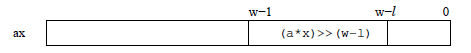
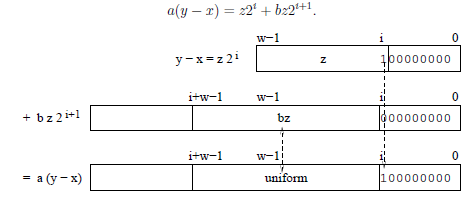

### Code

### Animation

### References

"High Speed Hashing for Integers and Strings" - by Mikkel Thorup, from Cornell University